In [1]:
from cslr.data.lsfb import load_datasets, load_dataloaders
from cslr.sampler import MultinomialBalancedSampler
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
datasets = load_datasets("/run/media/ppoitier/ppoitier/datasets/sign-languages/lsfb/isol")
len(datasets['train']), len(datasets['test'])

100%|██████████| 38129/38129 [00:06<00:00, 6223.86it/s]


(48506, 38129)

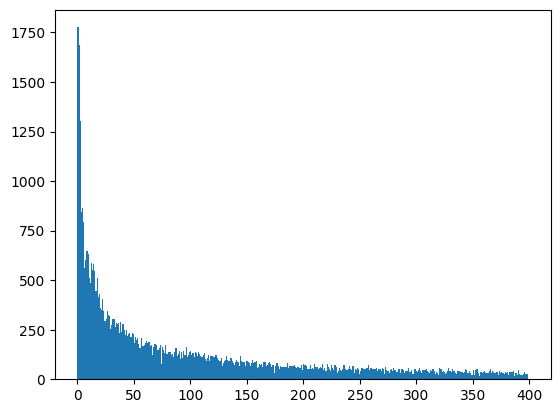

In [3]:
label_indices = [datasets['train'].targets[inst_id] for inst_id in datasets['train'].instances]
plt.figure()
plt.hist(label_indices, bins=400)
plt.show()

In [4]:
sampler = MultinomialBalancedSampler(label_indices, num_samples=50000)
dataloaders = load_dataloaders(datasets, batch_size=256, sampler=sampler)

  0%|          | 0/196 [00:00<?, ?it/s]/home/ppoitier/miniconda3/envs/dl/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ppoitier/miniconda3/envs/dl/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ppoitier/miniconda3/envs/dl/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ppoitier/miniconda3/envs/dl/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ppoitier/miniconda3/envs/dl/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ppoitier/miniconda3/envs/dl/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML


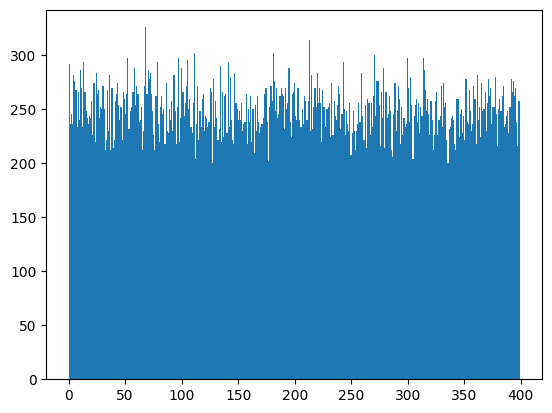

In [5]:
sampled_labels = []

for _, labels in tqdm(dataloaders['train'], total=len(dataloaders['train'])):
    sampled_labels += labels.tolist()

plt.figure()
plt.hist(sampled_labels, bins=400)
plt.show()